<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/HW_3_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
library("dplyr")
library("ggplot2")


In [2]:
library(httr)
filename <- "cardio_train.csv"
url <- "https://drive.google.com/uc?authuser=0&id=1qPKIRO3GfGNQK7rUFpZQWQRaNhTjHvJP&export=download"
GET(url, write_disk(filename, overwrite=TRUE))

Response [https://doc-00-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q3a0dlundc93gtij83bm4unkkks67vi1/1687679775000/16531863302665455688/*/1qPKIRO3GfGNQK7rUFpZQWQRaNhTjHvJP?e=download&uuid=30911064-3f24-4440-9bf6-fc64eff241bf]
  Date: 2023-06-25 07:56
  Status: 200
  Content-Type: text/csv
  Size: 2.94 MB
<ON DISK>  cardio_train.csvNULL

In [3]:
df = read.csv(filename, sep=";")

In [8]:
head(df, 3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0
2,1,20228,1,156,85,140,90,3,1,0,0,1,1
3,2,18857,1,165,64,130,70,3,1,0,0,0,1


In [9]:
dim(df)

[1] 70000    13

In [10]:
str(df)

'data.frame':	70000 obs. of  13 variables:
 $ id         : int  0 1 2 3 4 8 9 12 13 14 ...
 $ age        : int  18393 20228 18857 17623 17474 21914 22113 22584 17668 19834 ...
 $ gender     : int  2 1 1 2 1 1 1 2 1 1 ...
 $ height     : int  168 156 165 169 156 151 157 178 158 164 ...
 $ weight     : num  62 85 64 82 56 67 93 95 71 68 ...
 $ ap_hi      : int  110 140 130 150 100 120 130 130 110 110 ...
 $ ap_lo      : int  80 90 70 100 60 80 80 90 70 60 ...
 $ cholesterol: int  1 3 3 1 1 2 3 3 1 1 ...
 $ gluc       : int  1 1 1 1 1 2 1 3 1 1 ...
 $ smoke      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ alco       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ active     : int  1 1 0 1 0 0 1 1 1 0 ...
 $ cardio     : int  0 1 1 1 0 0 0 1 0 0 ...


In [12]:
df <- df %>% mutate(age_years=trunc(age/365)) #создадим новый столбец в годах и присоединим его

In [13]:
head(df)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,51
4,3,17623,2,169,82,150,100,1,1,0,0,1,1,48
5,4,17474,1,156,56,100,60,1,1,0,0,0,0,47
6,8,21914,1,151,67,120,80,2,2,0,0,0,0,60


In [25]:
install.packages("rafalib")
library(rafalib)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



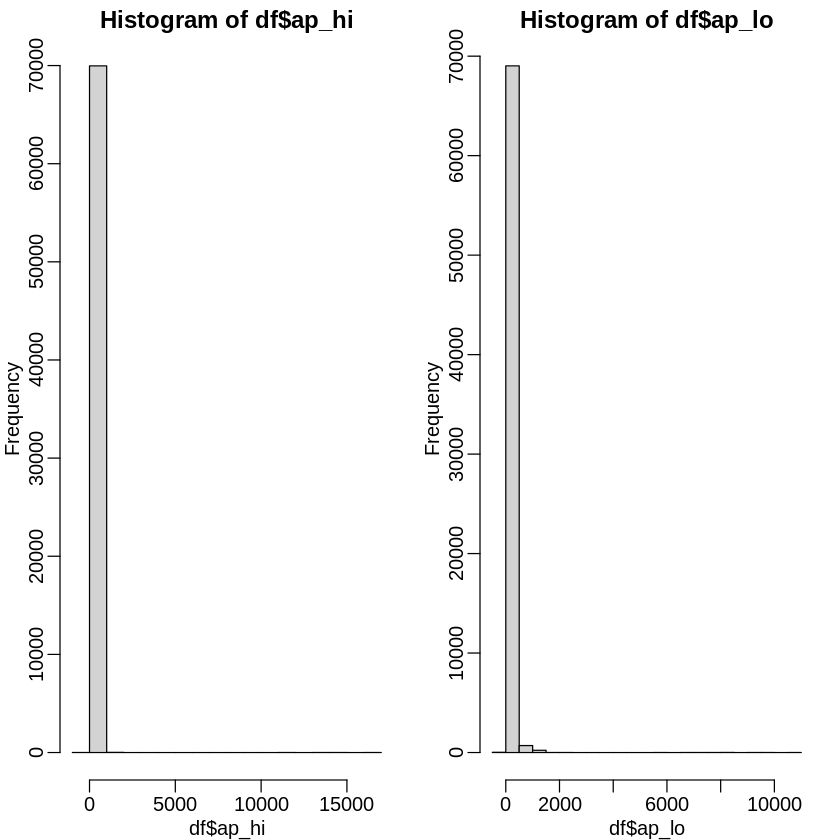

In [24]:
mypar(1,2)
hist(df$ap_hi)
hist(df$ap_lo) #гистограмма не показывает, что данные распределены нормально с большими выбросами(до 1500 и 1000), которые визуально не видно

In [14]:
cat(mean(df$ap_hi), mean(df$ap_lo)) #средние значения верхнего и нижнего АД

128.8173 96.63041

In [15]:
cat(sd(df$ap_hi), sd(df$ap_lo)) #разброс большой за счет выбросов, данные необх-мо обработать

154.0114 188.4725

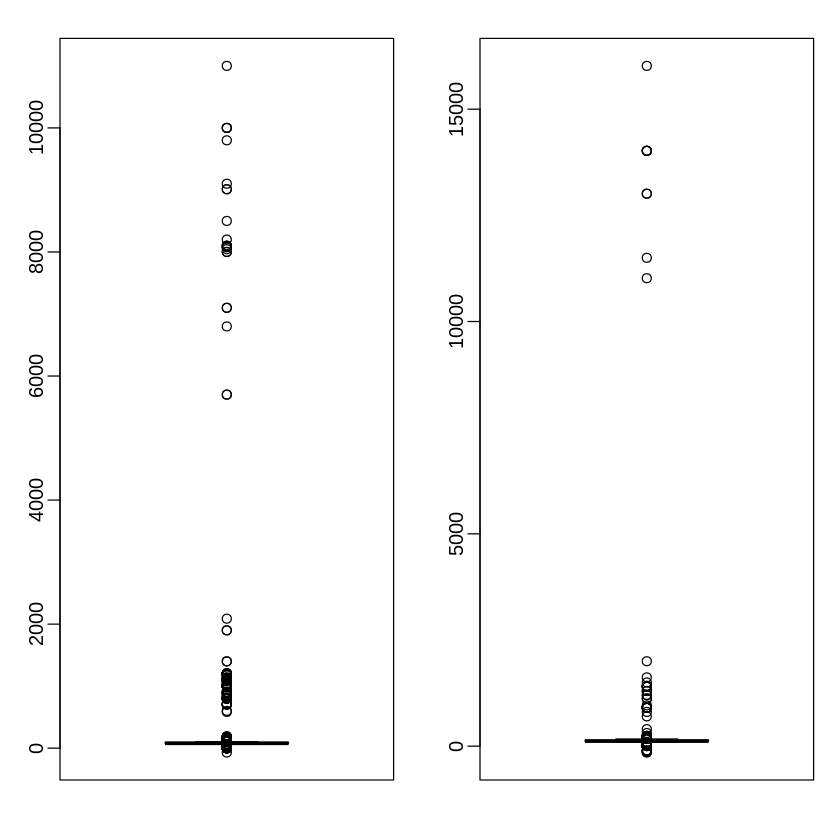

In [26]:
mypar(1,2)
box_lo <- boxplot(df$ap_lo)
box_hi <- boxplot(df$ap_hi) # на графике хорошо видны выбросы

In [27]:
ap_lo_capt <- "Нижнее давление"
ap_hi_capt <- "Верхнее давление"

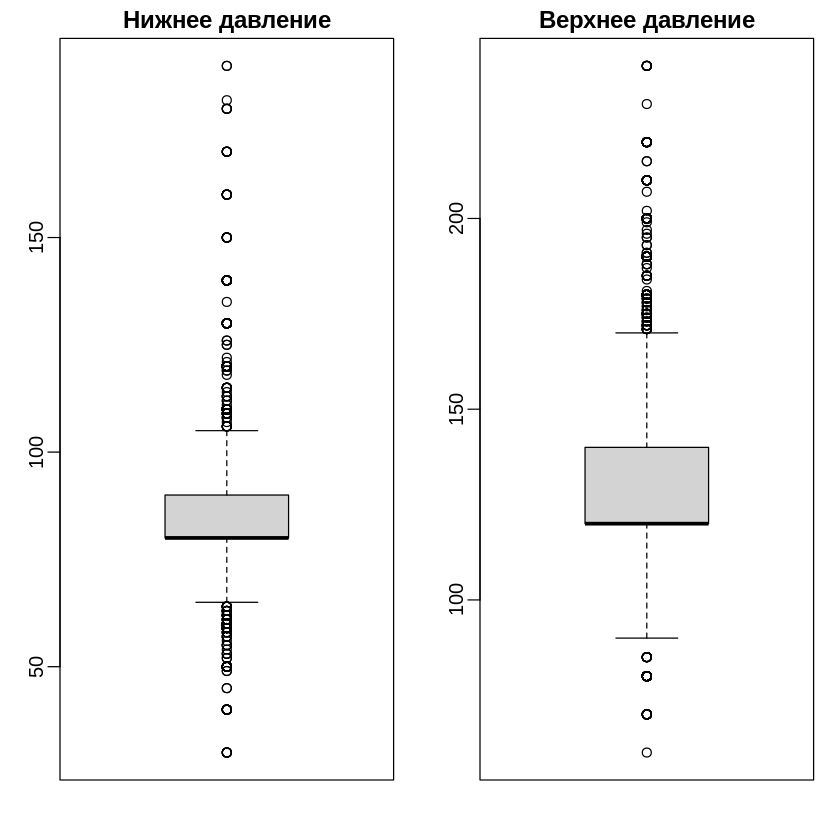

In [28]:
# Построим боксплоты без учета выбросов
mypar(1, 2)
box_lo <- boxplot(df$ap_lo[df$ap_lo<200 & df$ap_lo>20])
title(ap_lo_capt)
box_hi <- boxplot(df$ap_hi[df$ap_hi<300 & df$ap_hi>40])
title(ap_hi_capt)

In [31]:
cat(median(df$ap_lo), median(df$ap_hi))

80 120

In [32]:
cat(quantile(df$ap_lo, 0.25), quantile(df$ap_hi, 0.25))

80 120

In [33]:
cat(median(df$ap_lo), median(df$ap_hi))

-70 -150

In [34]:
cat(max(df$ap_lo), max(df$ap_hi))

11000 16020

In [40]:
sort(df$ap_lo)[17249:35000] # значения с 25го до 50го перцентиля

[1] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
   [25] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
   [49] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
   [73] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
   [97] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [121] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [145] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [169] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [193] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [217] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [241] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [265] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [289] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [313] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [337] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [361] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [385] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [409] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [433] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [457] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [481] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [505] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [529] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [553] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [577] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [601] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [625] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [649] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [673] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [697] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [721] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [745] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [769] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [793] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [817] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [841] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [865] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [889] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [913] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [937] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [961] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [985] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1009] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1033] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1057] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1081] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1105] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1129] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1153] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1177] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [12

In [41]:
tidy_set <- df %>% filter((ap_lo<200 & ap_lo>20) & (ap_hi<300 & ap_hi>40)) #новый датасет без выбросов с нужными строками
head(tidy_set, 3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,51


In [43]:
cat(dim(df),dim(tidy_set))

70000 14 68781 14

In [38]:
cat(mean(tidy_set$ap_hi), mean(tidy_set$ap_lo)) #средние арим не сильно изменилось для верхнего АД, для нижнего - снизилось

126.6153 81.37756

In [39]:
cat(sd(tidy_set$ap_hi), sd(tidy_set$ap_lo)) #изменчивость уменьшилось в 10 раз!!

16.76354 9.688359

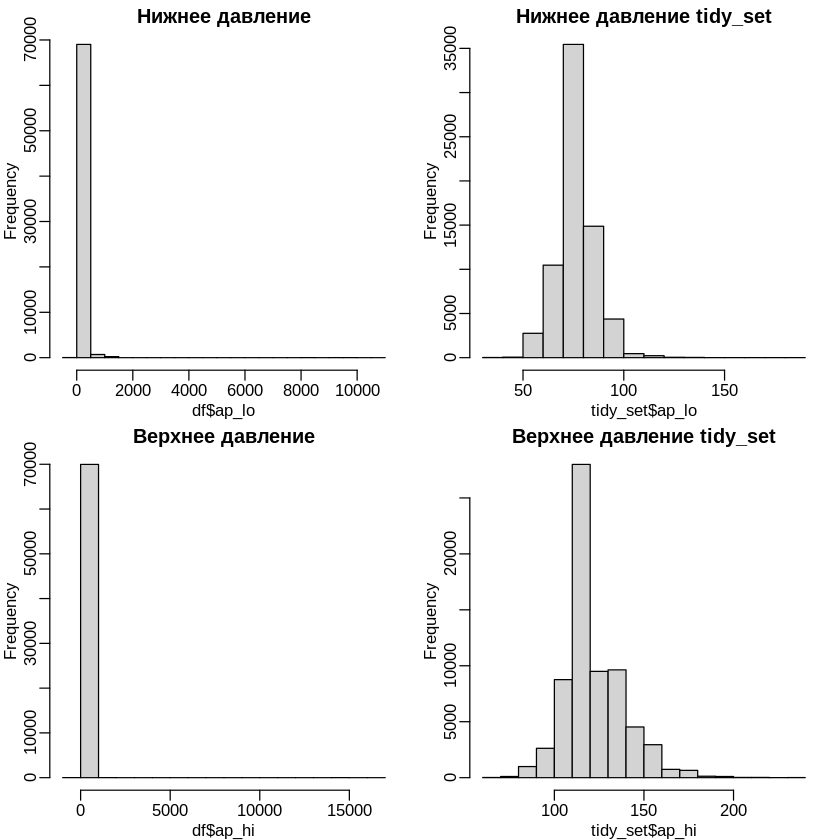

In [42]:
mypar(2, 2) #видно, что распредение без выбросов ближе к нормальному, но ассиметрия есть
hist(df$ap_lo, main=ap_lo_capt)
hist(tidy_set$ap_lo, main=paste(ap_lo_capt, "tidy_set"))
hist(df$ap_hi, main=ap_hi_capt)
hist(tidy_set$ap_hi, main=paste(ap_hi_capt, "tidy_set"))

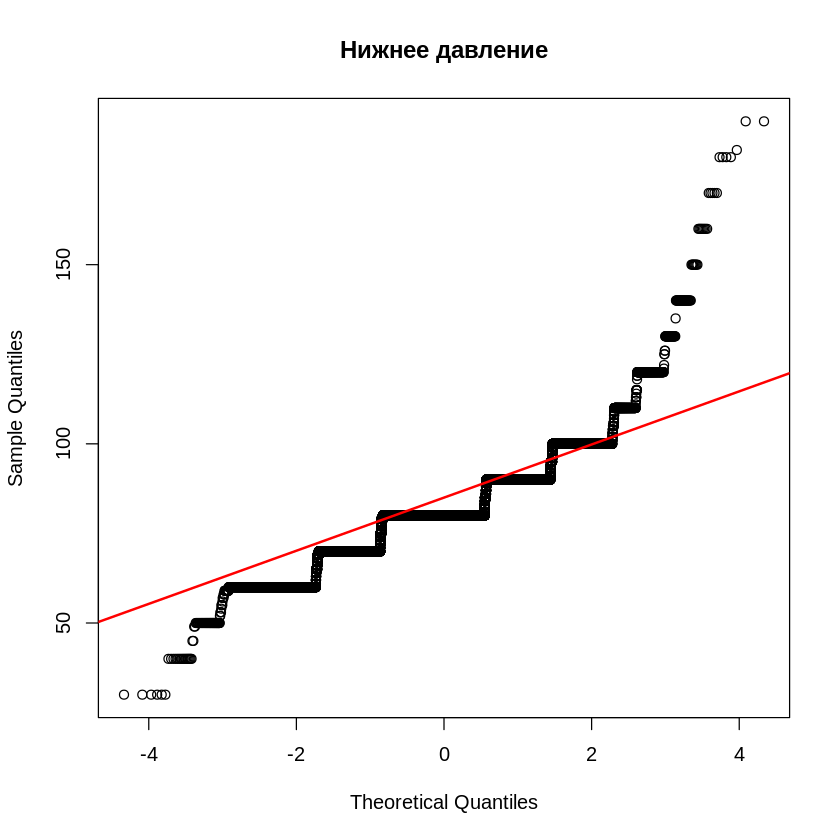

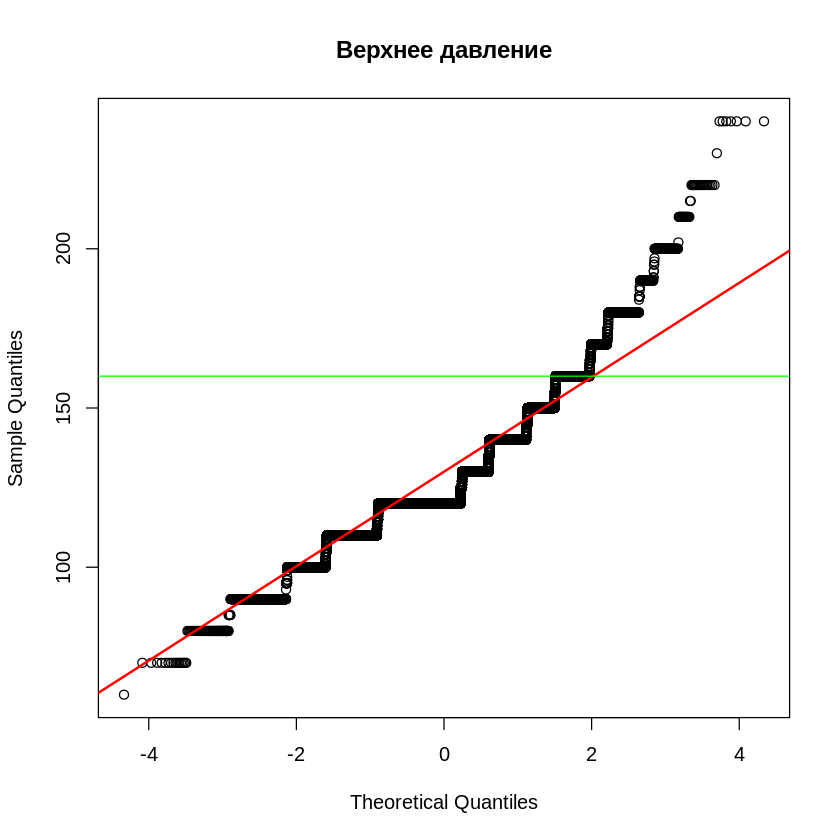

In [44]:
qqnorm(tidy_set$ap_lo, main=ap_lo_capt) #метод проверки нормальности
qqline(tidy_set$ap_lo, col="red", lwd=2) #нормальное распредение для нижнего АД
qqnorm(tidy_set$ap_hi, main=ap_hi_capt)
qqline(tidy_set$ap_hi, col="red", lwd=2) #нормальное распредение для высокого АД
abline(h=160, col="green")

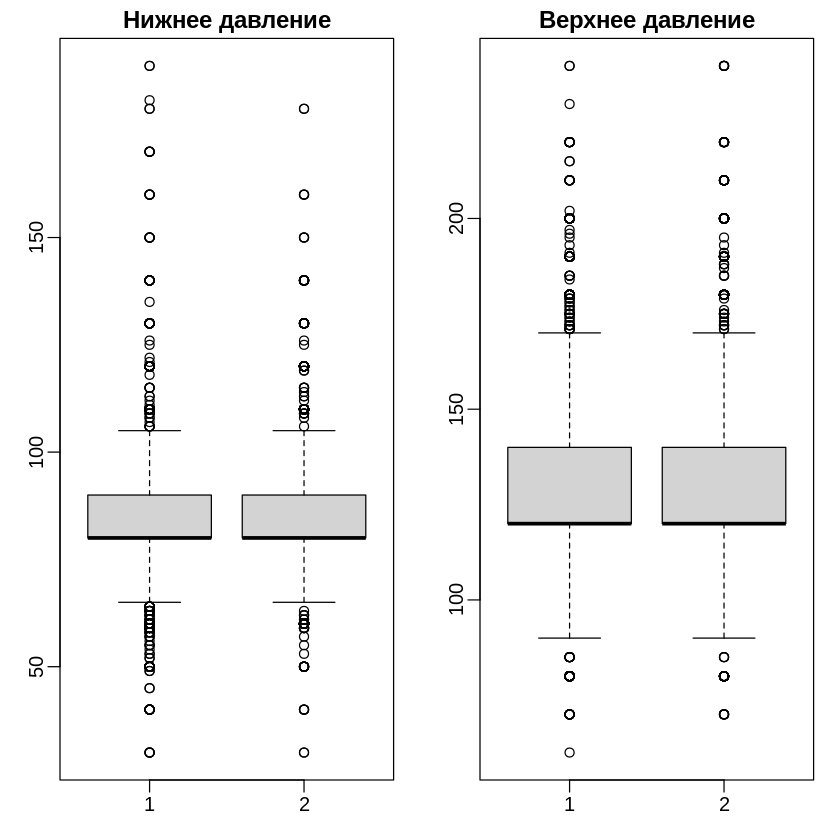

In [45]:
mypar(1,2) #сравним значения у гендеров, не видно заметных различий нет, давление от пола не зависит
groupss_lo <- split(tidy_set$ap_lo, tidy_set$gender)
boxplot(groupss_lo)
title(ap_lo_capt)
groupss_hi <- split(tidy_set$ap_hi, tidy_set$gender)
boxplot(groupss_hi)
title(ap_hi_capt)

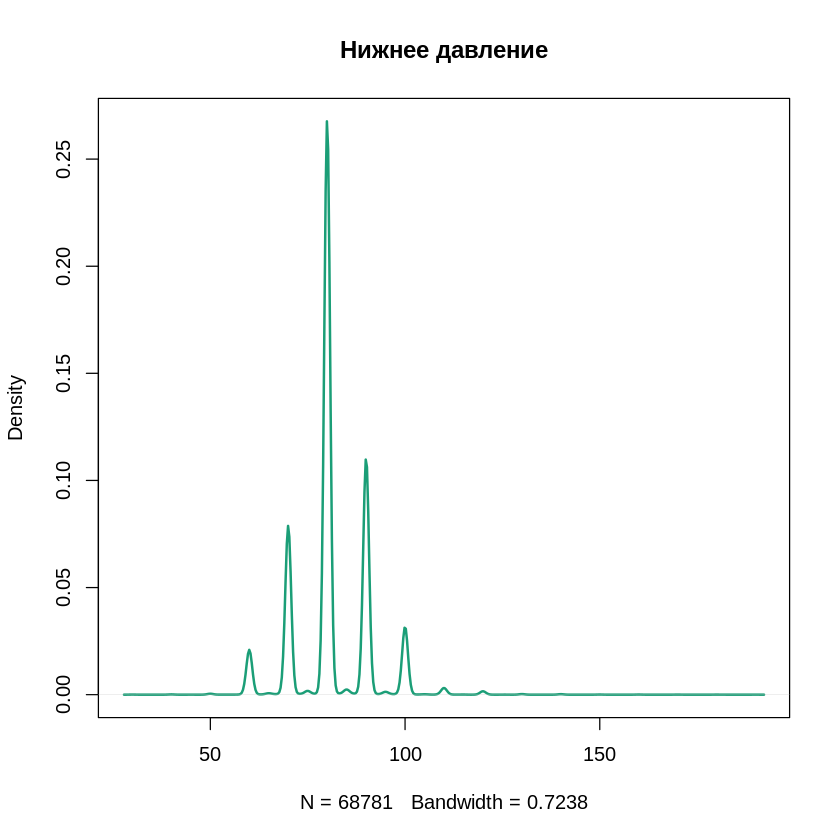

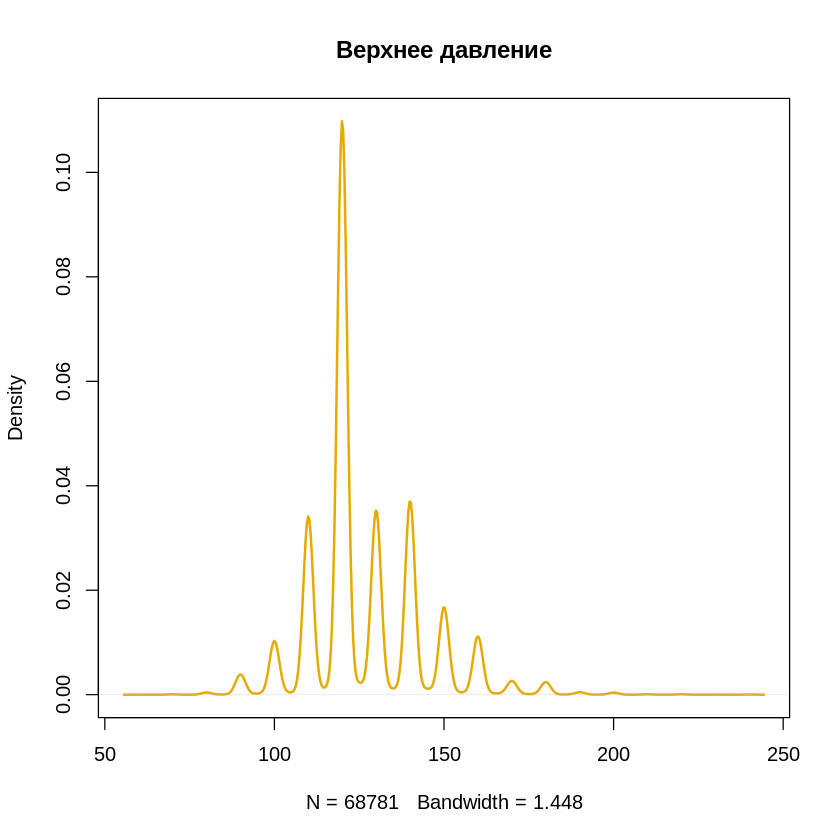

In [48]:
plot(density(tidy_set$ap_lo), col=1, lwd=2, main=ap_lo_capt) #график плотности распределения для давления
plot(density(tidy_set$ap_hi), col=6, lwd=2, main=ap_hi_capt)
#форма напоминает нормальное распределение, но пиков много, тк много округлений в данных и они одиннаковы и сгруппируются, создавая пики

[1] 66 66 66 66 66 66 66 66 66 66 66 66 67 67 67 67 67 67 67 67 67 67 67 67
   [25] 67 67 67 67 67 67 67 68 68 68 68 68 68 68 68 68 68 68 68 68 69 69 69 69
   [49] 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
   [73] 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
   [97] 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
  [121] 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
  [145] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [169] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [193] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [217] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [241] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [265] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [289] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [313] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [337] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [361] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [385] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [409] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [433] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [457] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [481] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [505] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [529] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [553] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [577] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [601] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [625] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [649] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [673] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [697] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [721] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [745] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [769] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [793] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [817] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [841] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [865] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [889] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [913] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [937] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [961] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [985] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1009] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1033] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1057] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1081] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1105] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1129] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1153] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1177] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [12

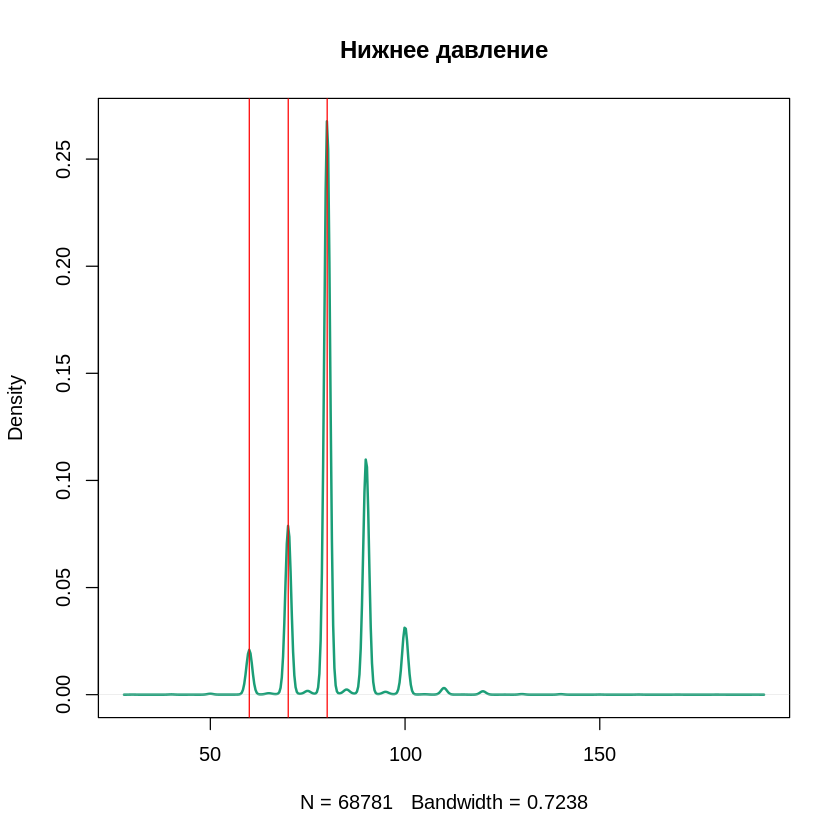

In [49]:
plot(density(tidy_set$ap_lo), col=1, lwd=2, main=ap_lo_capt)
abline(v=70, col="red")
abline(v=60, col="red")
abline(v=80, col="red")
sort_lo <- sort(tidy_set$ap_lo)
cut_1 <- sort_lo[sort_lo>65 & sort_lo<75]
cut_1

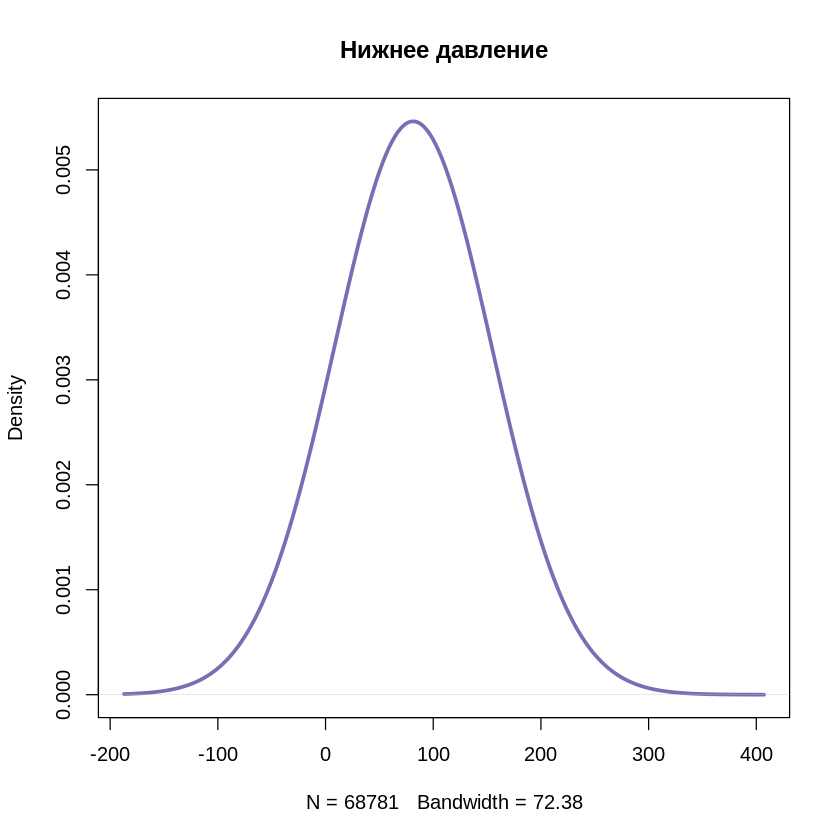

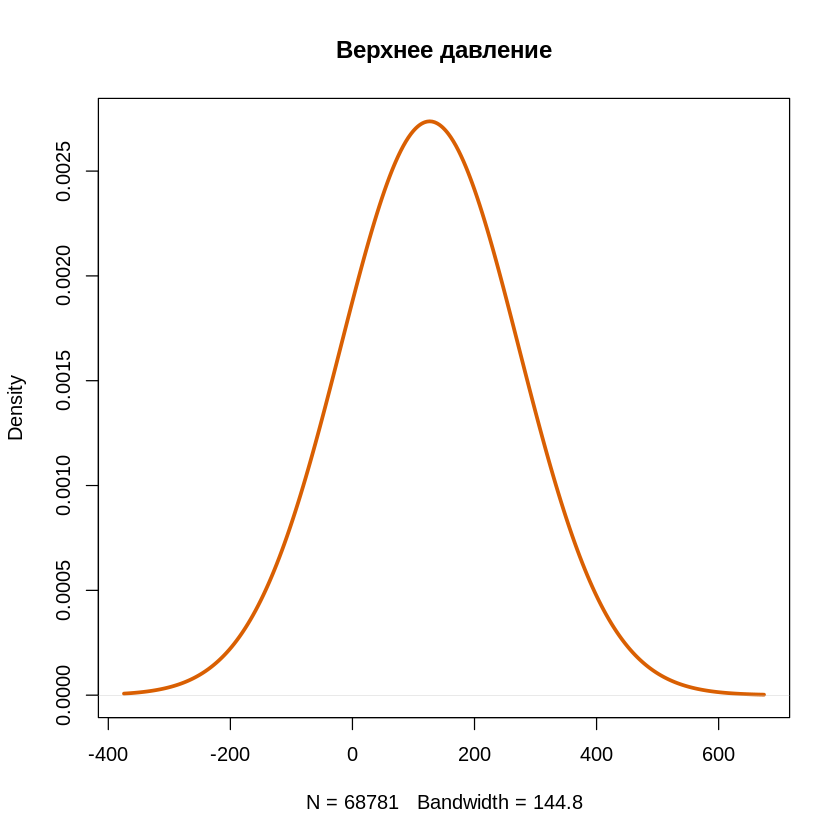

In [54]:
plot(density(tidy_set$ap_lo, adjust=100), col=3, lwd=3, main=ap_lo_capt) #изобразим нормальное распределение
plot(density(tidy_set$ap_hi, adjust=100), col=10, lwd=3, main=ap_hi_capt)

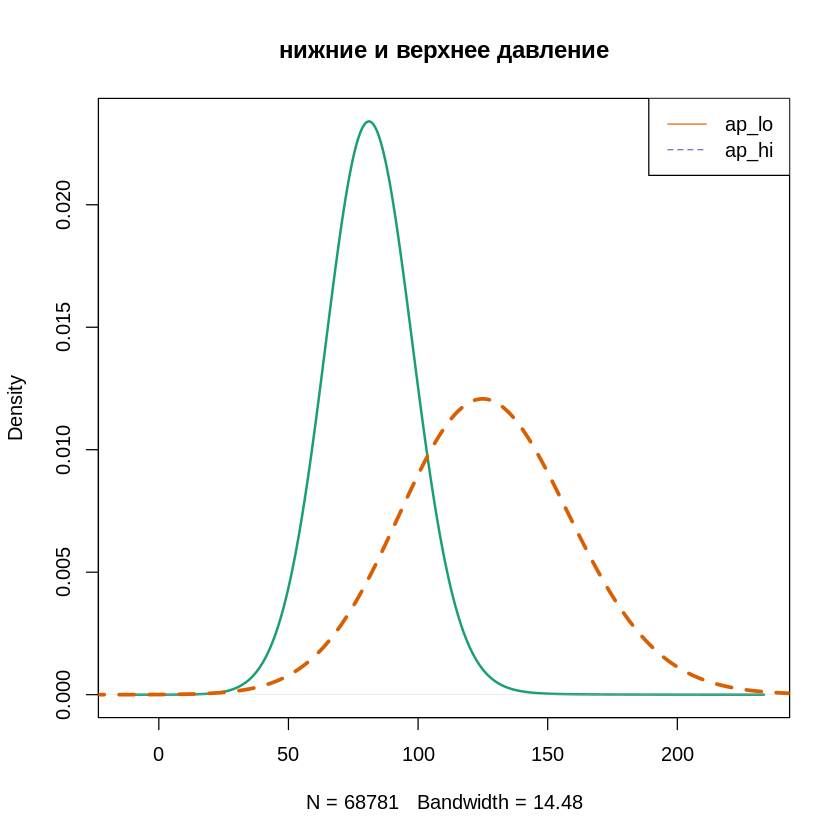

In [62]:
plot(density(tidy_set$ap_lo, adjust=20), col=1, lwd=2,main= 'нижние и верхнее давление')
lines(density(tidy_set$ap_hi, adjust=20), col=10, lwd=3, lty=2)
legend("topright", c("ap_lo", "ap_hi"), col=c(2, 3), lty=c(1, 2)) #в одной координатной плоскости расположение данных

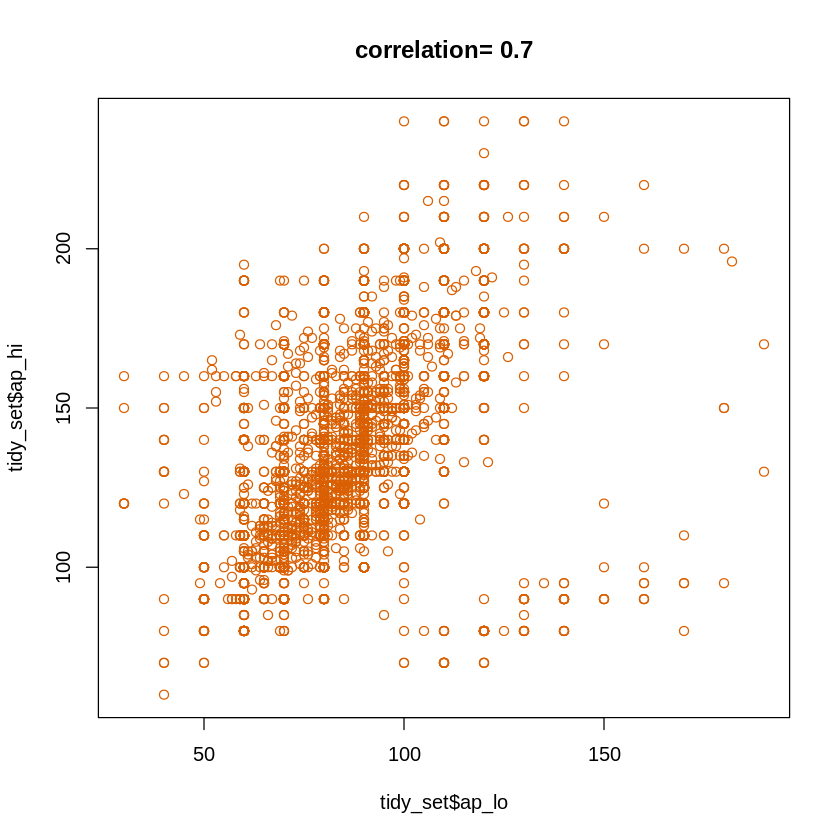

In [63]:
plot(
    tidy_set$ap_lo,
    tidy_set$ap_hi,
    col=2,
    main=paste(
        "correlation=",
        signif(cor(tidy_set$ap_lo, tidy_set$ap_hi), 2)
    )
)
#скаттерплот, проследит взаимосвязь, заметная положительная корреляция
#с ростом вернехого АД растет и нижние АД

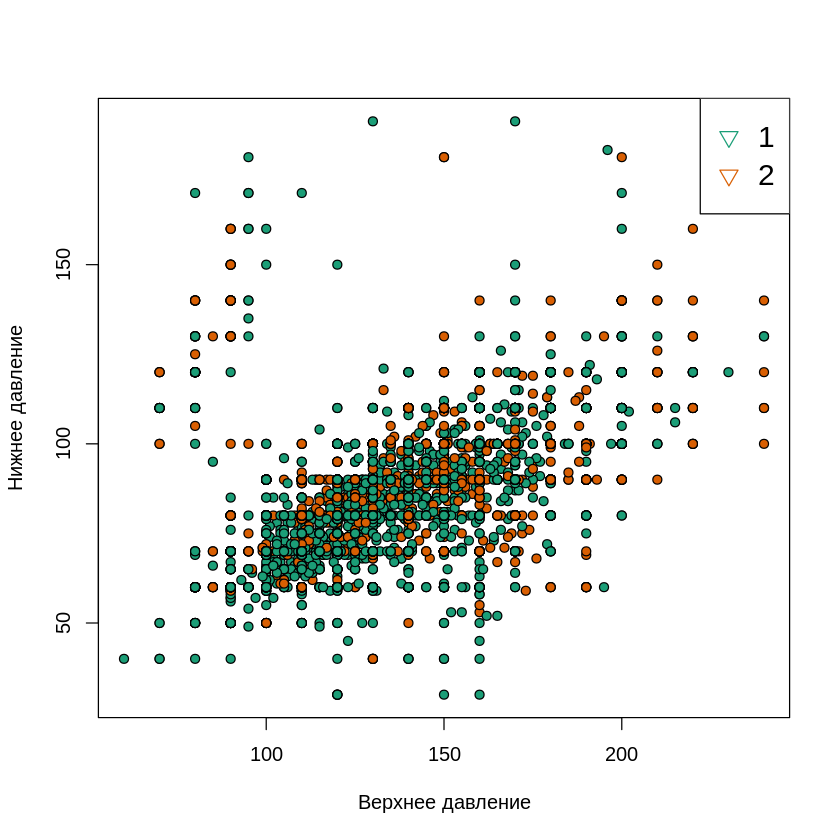

In [65]:
plot(
    tidy_set$ap_hi,
    tidy_set$ap_lo,
    pch=21,
    bg=as.numeric(factor(tidy_set$gender)),
    xlab=ap_hi_capt,
    ylab=ap_lo_capt
)
legend(
    "topright",
    levels(factor(tidy_set$gender)),
    col=seq(along=levels(factor(tidy_set$gender))),
    pch=25,
    cex=1.5
)
#разделение на группы нет, судя по графику. Те показатели давления не могут показать гендерную принадлежность

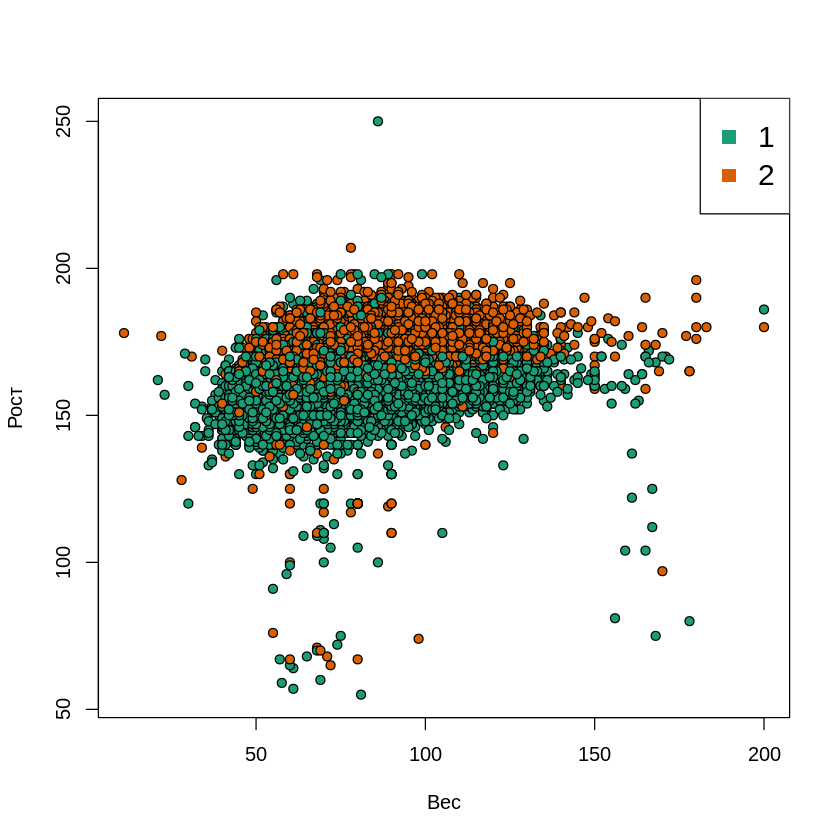

In [66]:
plot(
    tidy_set$weight,
    tidy_set$height,
    pch=21,
    bg=as.numeric(factor(tidy_set$gender)),
    xlab="Вес",
    ylab="Рост"
)
legend(
    "topright",
    levels(factor(tidy_set$gender)),
    col=seq(along=levels(factor(tidy_set$gender))),
    pch=15,
    cex=1.5
)

#разделение по росту и весу с полом есть. Эти признаки хорошо прогнозируют пол

In [67]:
mini_set <- tidy_set[,3:5]
head(mini_set)
#уменьшим кол-во признаков в дс

,gender,height,weight
,<int>,<int>,<dbl>
1,2,168,62
2,1,156,85
3,1,165,64
4,2,169,82
5,1,156,56
6,1,151,67


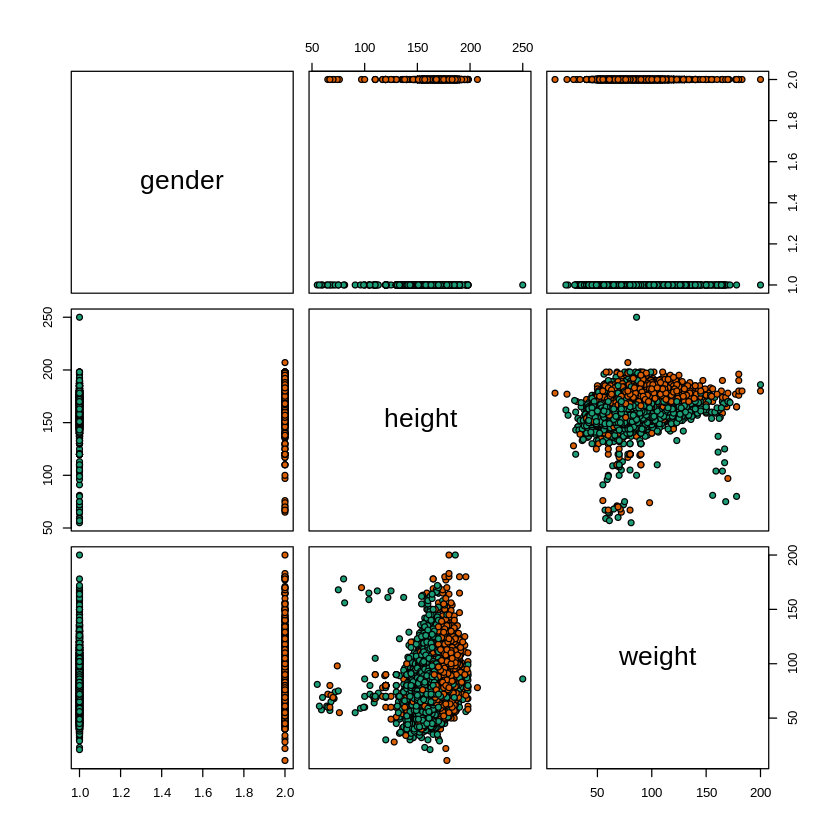

In [68]:
plot(mini_set, pch=21, bg=mini_set$gender)
#делим по полу и росту с весом.

In [69]:
mini_set_1 <- tidy_set[,c(3,6,7)]
head(mini_set_1)
#делим по полу и АД

,gender,ap_hi,ap_lo
,<int>,<int>,<int>
1,2,110,80
2,1,140,90
3,1,130,70
4,2,150,100
5,1,100,60
6,1,120,80


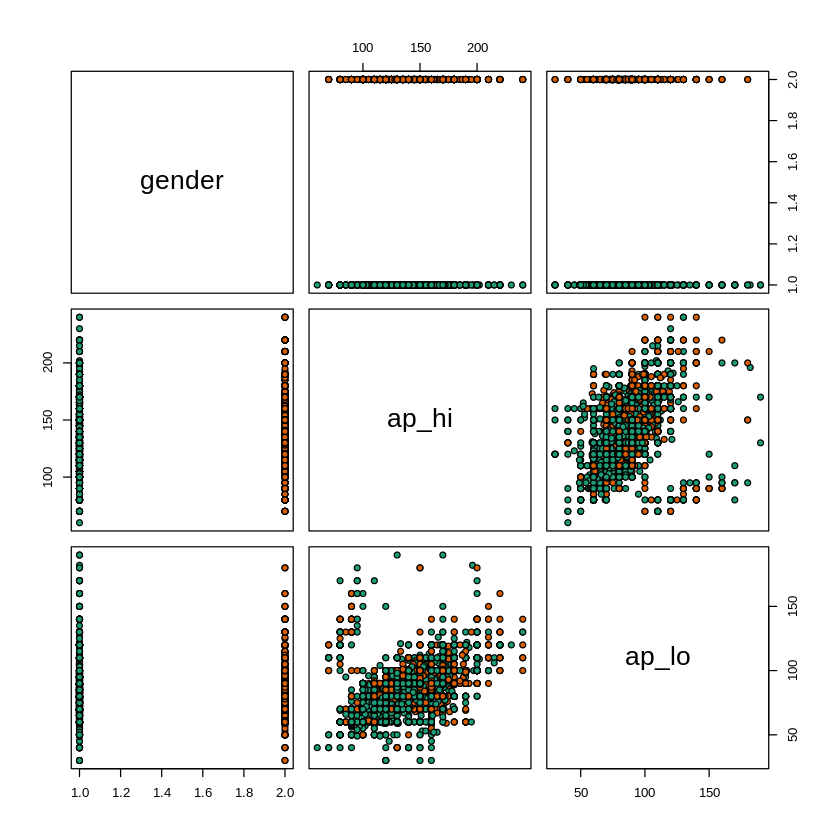

In [70]:
plot(mini_set_1, pch=21, bg=mini_set_1$gender)